![1585800027_z1BUns_200324_D_HN545_003.jfif](attachment:1585800027_z1BUns_200324_D_HN545_003.jfif )
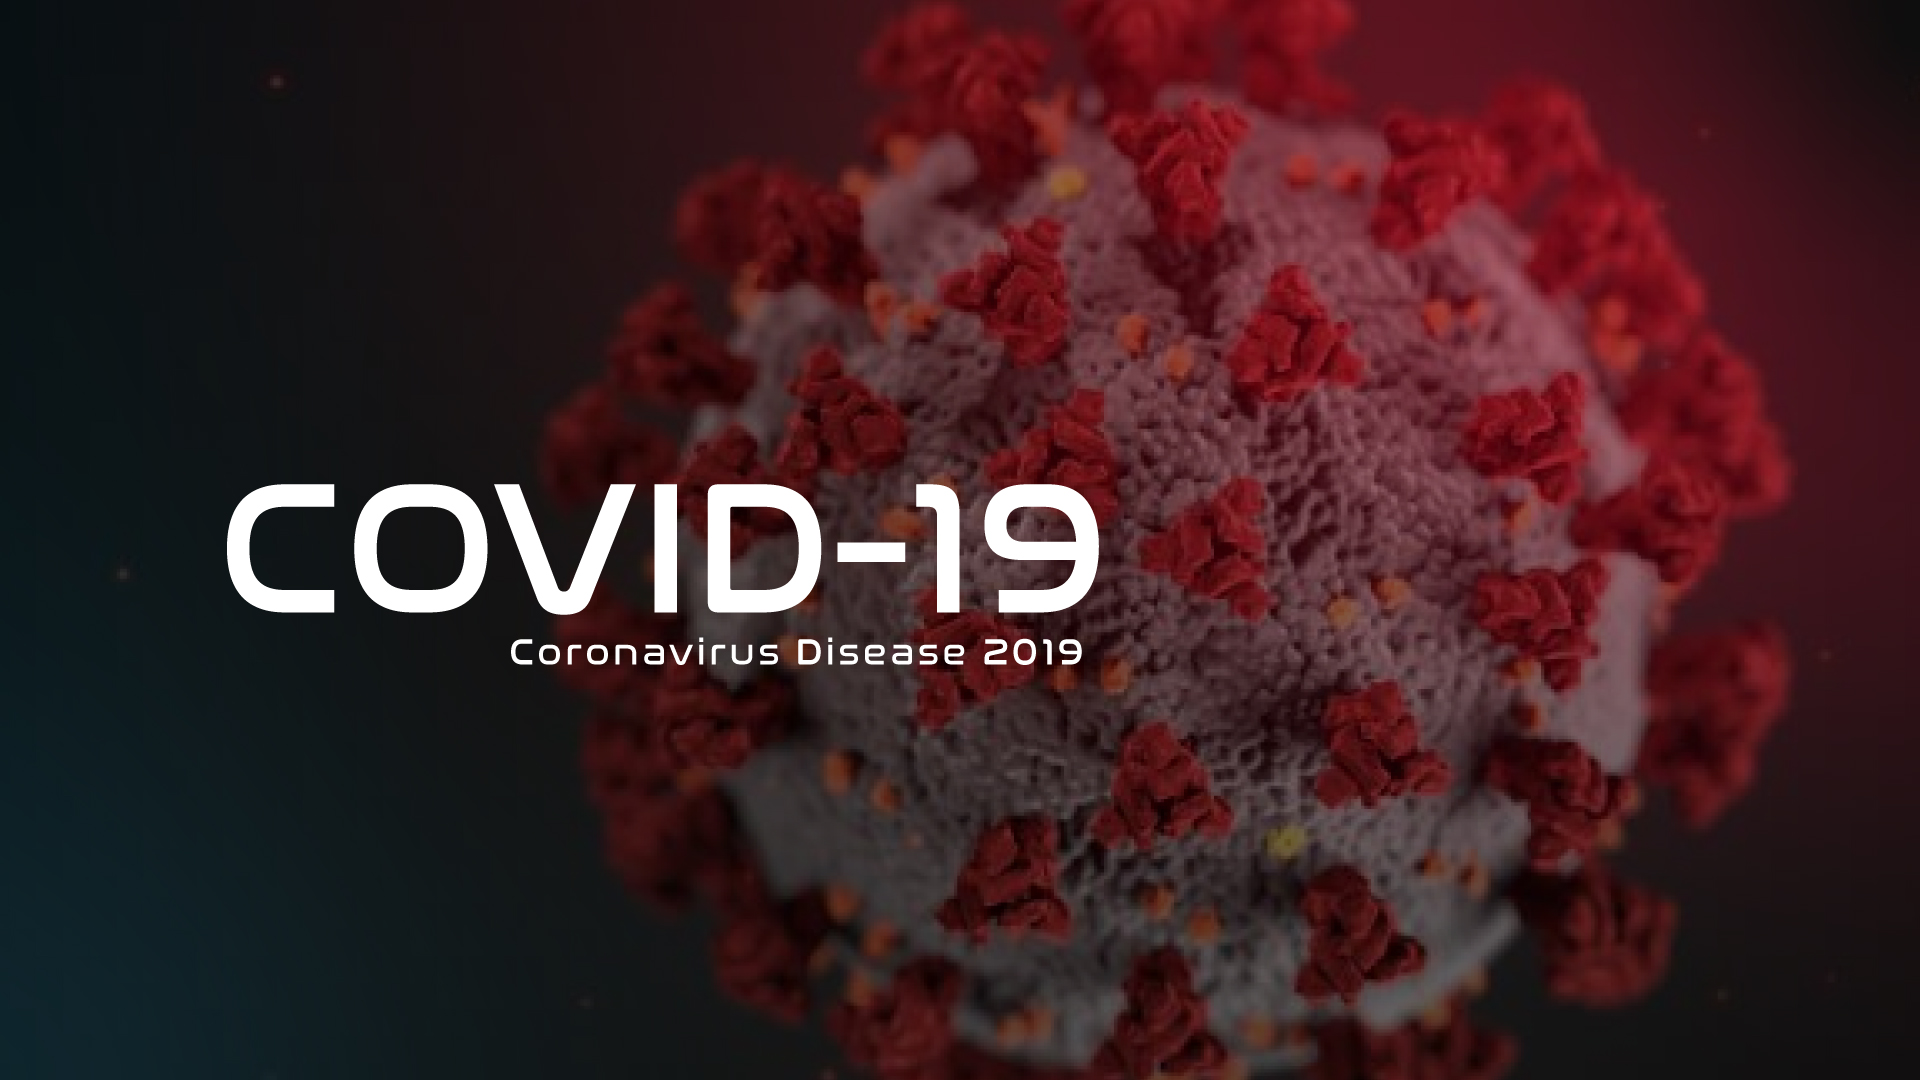

# Tracking: impact and forecast the counts of COVID-19 in India

### Definitions


* **Confirmed** = total cumulative count of detected = (Total Recovered) + (Total deaths)

* **Recovered** = cumulative number of recovered among detected cases.

* **Deaths** = cumulative number of deaths among detected cases.

* **Active** = (Confirmed) - (Recovered) - (Deaths). 


**The world is facing humanity’s biggest crisis since World War II. Almost every country has been affected by the devastating Coronavirus disease (COVID-19). An outbreak from China has gone everywhere. In the last few months, Corona’s epicentre has been shifted from China to Europe to the United States. Till date, over 26 million people had been affected by COVID-19 and about 0.85 million people had died worldwide. Indirectly, billions of people have been suffering from the impact of the global pandemic of COVID-19.**




1. [Import Libraries](#heading1)
2. [Read Data Sets](#heading2)
2. [Data Preparation](#heading3)
3. [Analysing the present condition in India](#heading4)
 * [Confirmed Case](#subheading1)
 * [Recovered Case](#subheading2)
 * [Deceased](#subheading3)
  


### 1. Import Libraries <a id="heading1"></a>

In [529]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import folium

### 2. Read Data Sets <a id="heading2"></a>

In [530]:
#Read Data
df=pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')

coordinates = pd.read_excel("Indian Coordinates.xlsx")
df_full = pd.merge(coordinates,df,on="State")

df_time_series=pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')


### 3. Data Preparation <a id="heading3"></a>

In [531]:
#Data Preparation
#Drop unwanted columns
df.drop(['Migrated_Other','Last_Updated_Time','Migrated_Other','Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],axis = 1,inplace= True)

#Remove unwanted rows
df = df[(df.State != 'Total')& (df.State != 'State Unassigned')]

#Sort Dataframe by Confirmed Cases
df.sort_values(by='Confirmed',inplace=True,ascending=False)

#Date Colum fix
df_time_series['Year']='2020'
df_time_series["Date"] = df_time_series['Date'] + df_time_series['Year']

df_time_series['Date']=pd.to_datetime(df_time_series['Date'], format='%d %B %Y')

df_time_series.drop(['Year'],axis=1,inplace=True)


### 4. Analysing the present condition in India <a id="heading4"></a>

The first COVID-19 case was reported on 30th January 2020 when a student arrived Kerala from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting the states and UT. Here is a brief timeline of the cases in India.

In [532]:
#latest 10 days info
df_time_series[['Date','Daily Confirmed','Daily Recovered','Daily Deceased']].tail(10)

,Date,Daily Confirmed,Daily Recovered,Daily Deceased
207,2020-08-24,59696,66305,854
208,2020-08-25,66873,64151,1066
209,2020-08-26,75995,56191,1017
210,2020-08-27,76827,59620,1066
211,2020-08-28,76657,64475,1019
212,2020-08-29,78479,64982,943
213,2020-08-30,79461,60422,960
214,2020-08-31,68766,64435,816
215,2020-09-01,78168,62145,1027
216,2020-09-02,82860,67874,1026


### 4.1 Confirmed Case <a id="subheading1"></a>

Text(0.5, 1.0, 'COVID Confirmed Cases in India')

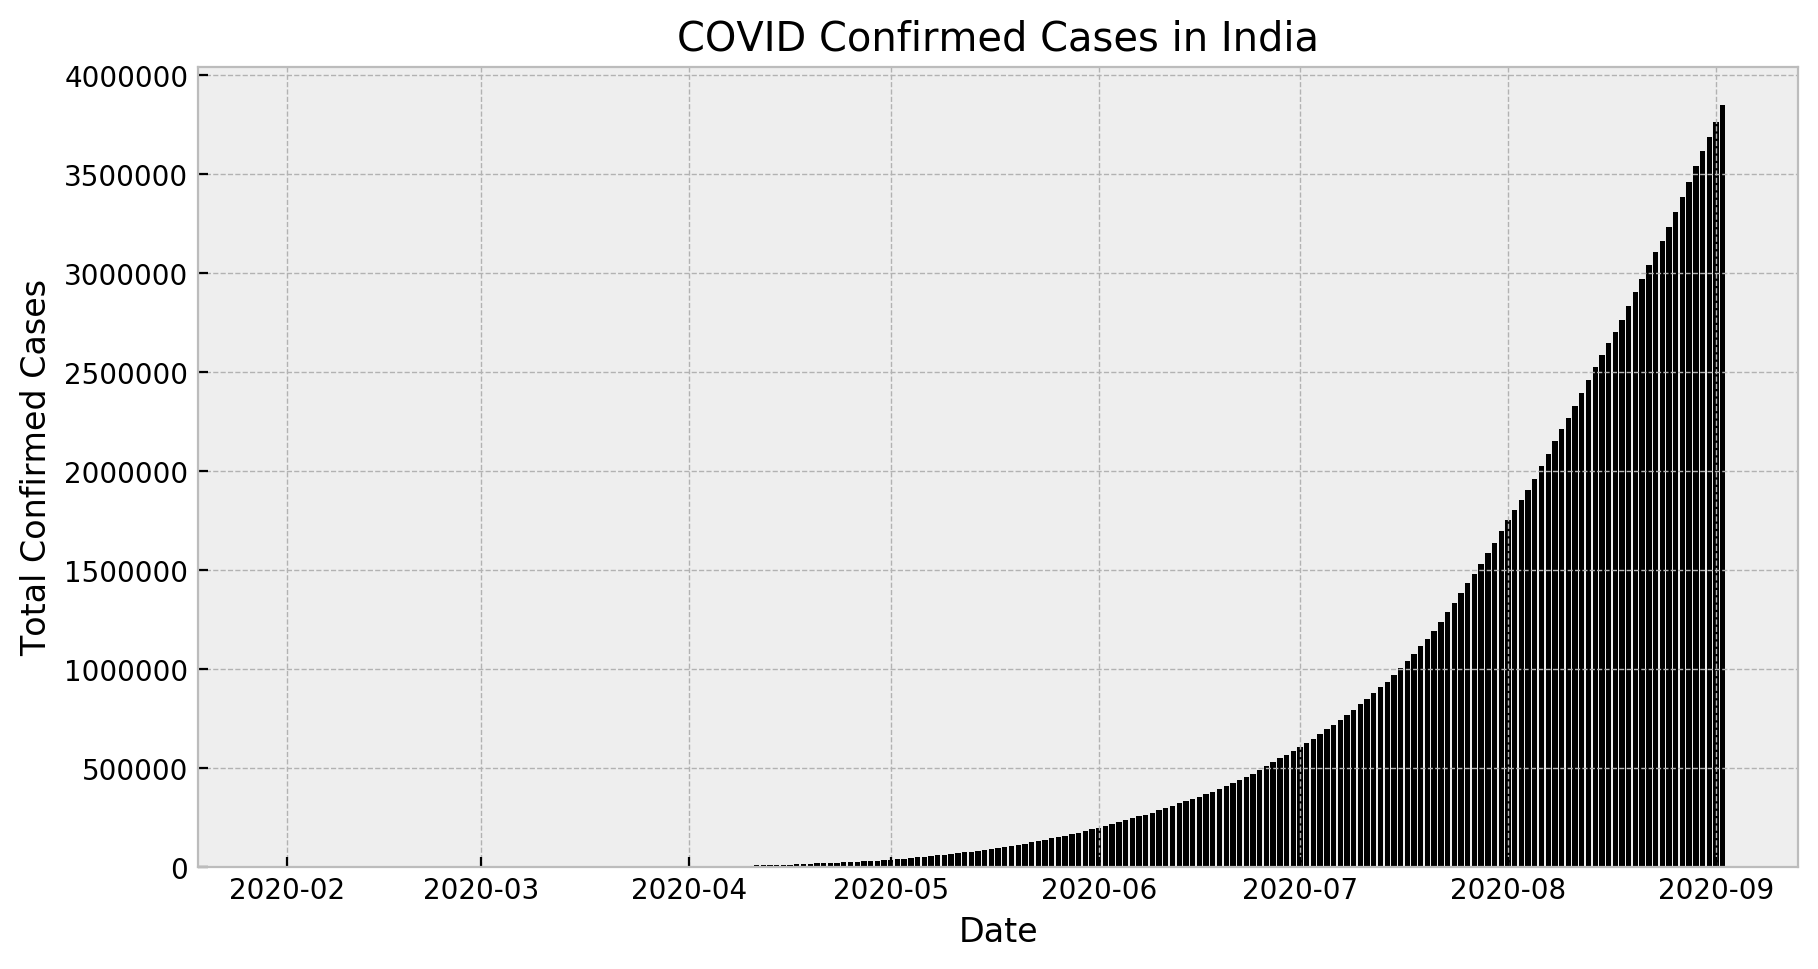

In [533]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df_time_series["Date"],df_time_series["Total Confirmed"],color='black')
axes.set_xlabel("Date")
axes.set_ylabel("Total Confirmed Cases")
axes.set_title("COVID Confirmed Cases in India")

Text(0.5, 1.0, 'COVID Confirmed Cases in India')

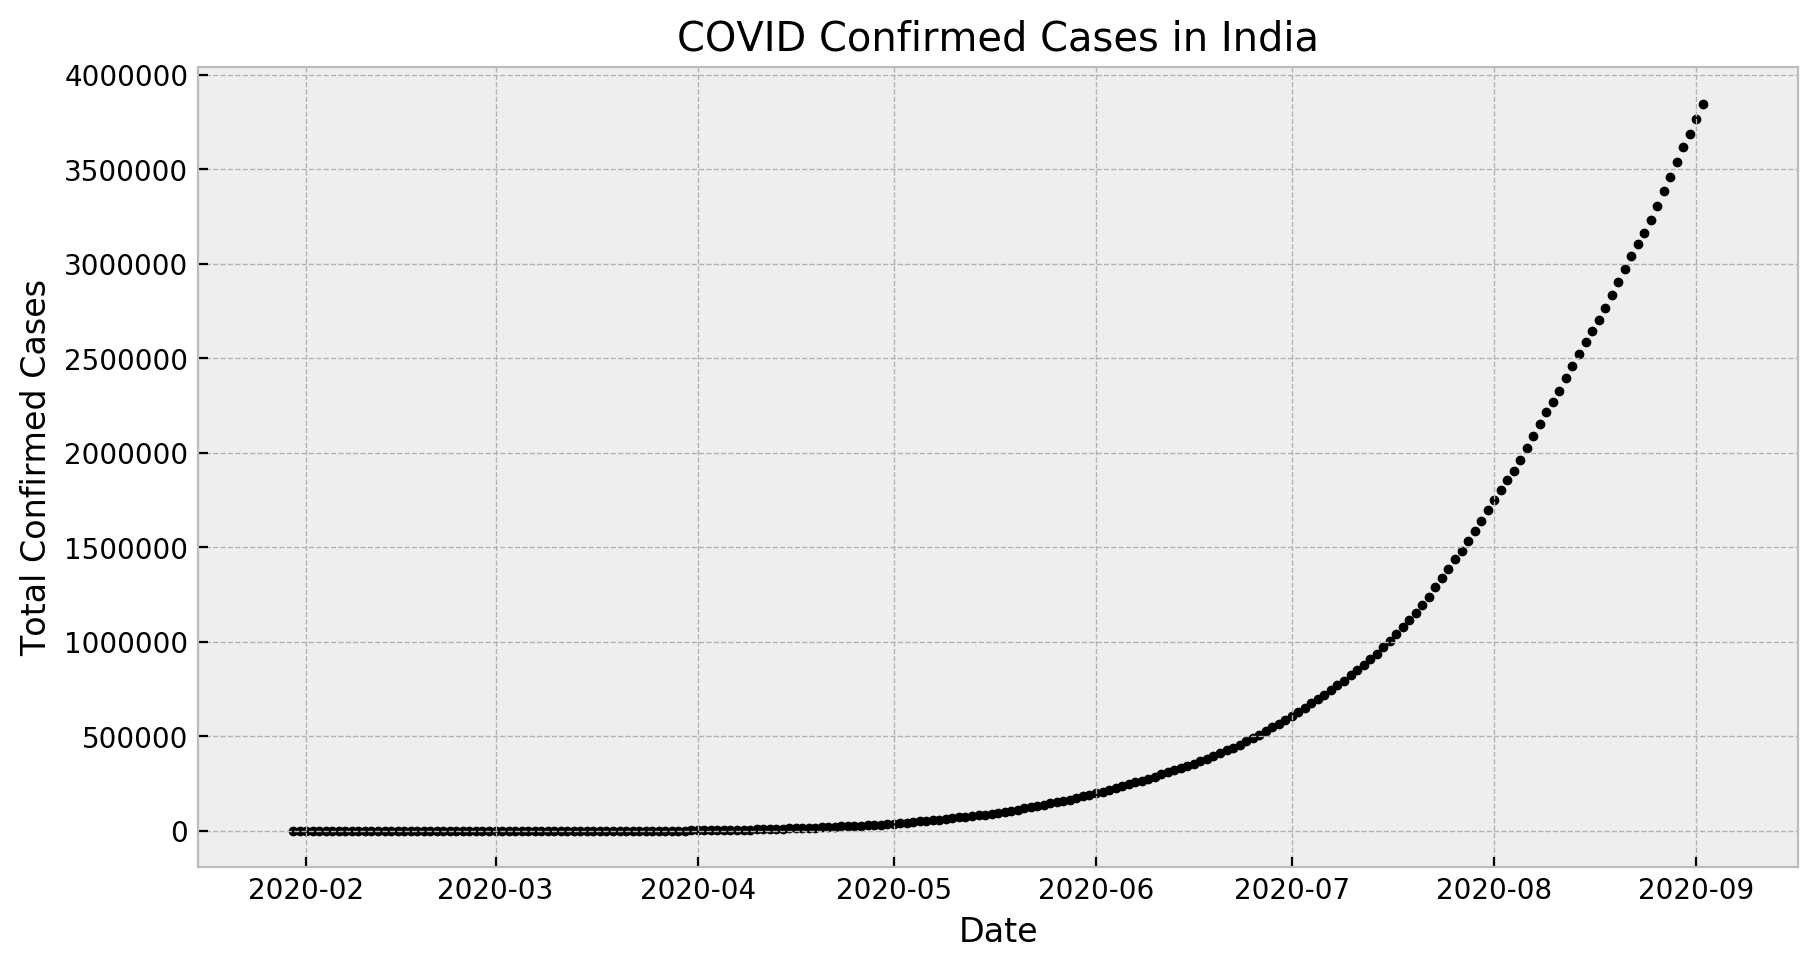

In [534]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df_time_series["Date"],df_time_series["Total Confirmed"],color='black',marker=".")
axes.set_xlabel("Date")
axes.set_ylabel("Total Confirmed Cases")
axes.set_title("COVID Confirmed Cases in India")

In [535]:
fig = px.scatter(df_time_series, x="Date", y="Total Confirmed", color="Total Confirmed", title="COVID in India",color_continuous_scale='Bluered')
fig.show()

fig.write_html("confirmed.html")

<A HREF = "confirmed.html">Cumulative Confirmed Case</A>

### 4.2 Recovered Case <a id="subheading2"></a>

Text(0.5, 1.0, 'COVID Recovered Cases in India')

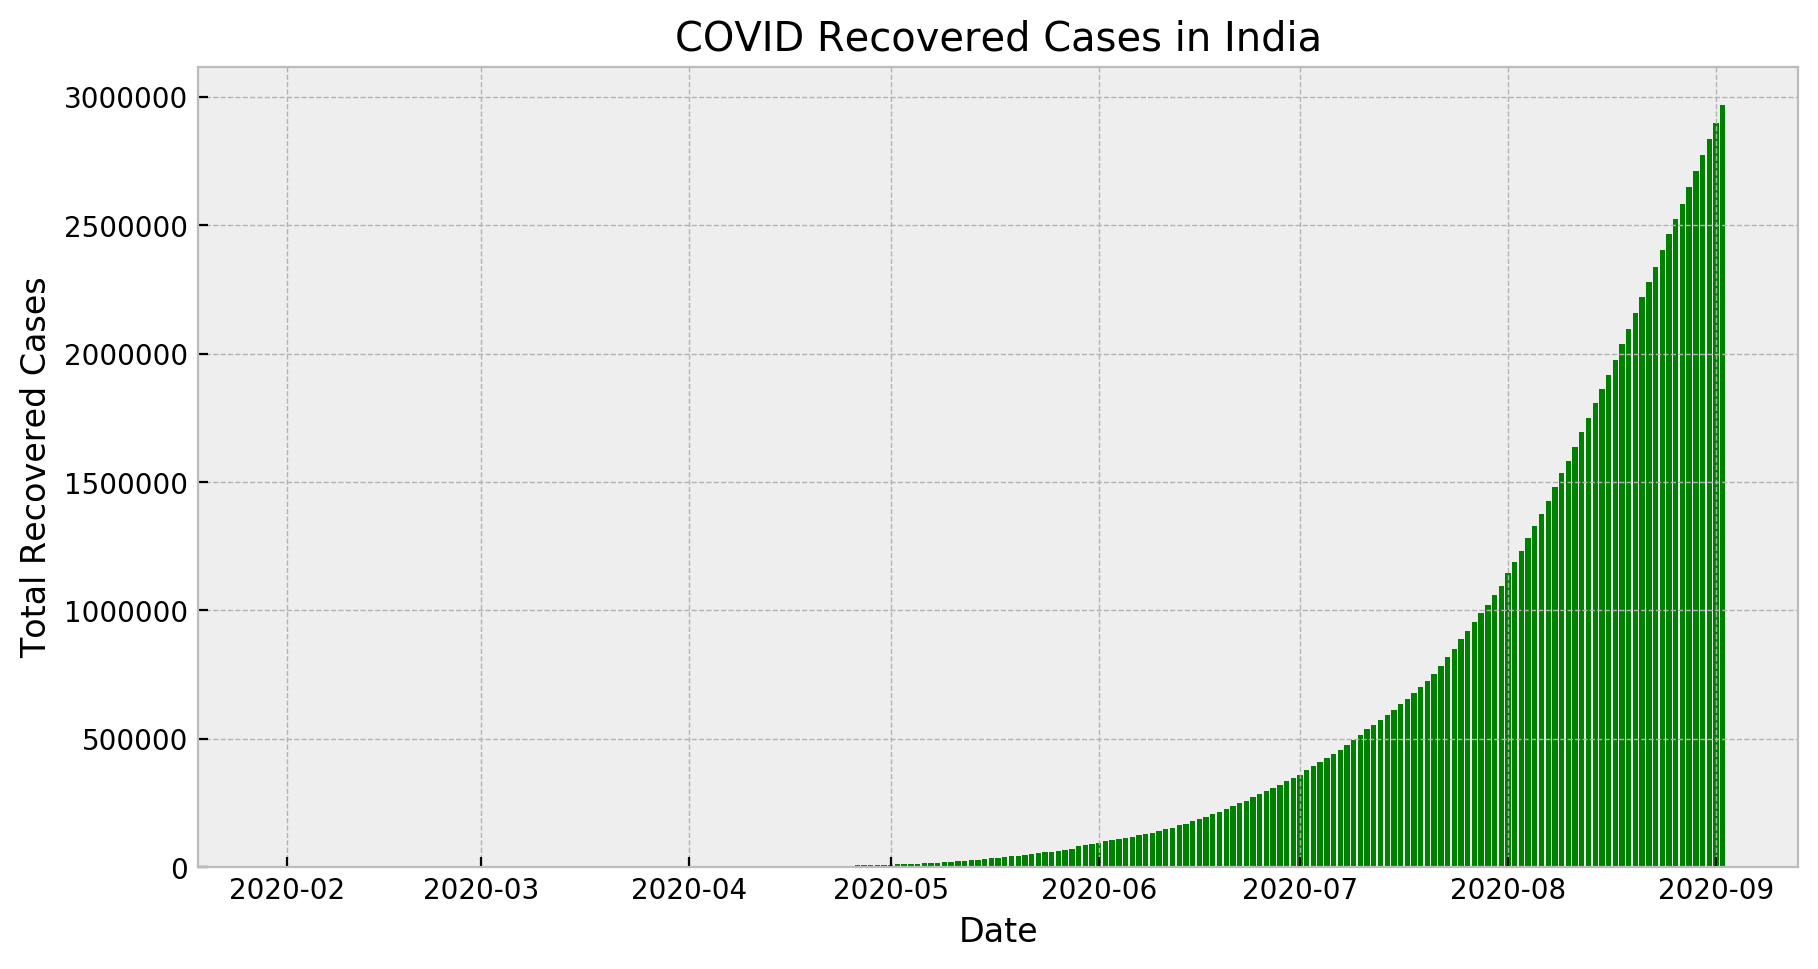

In [536]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df_time_series["Date"],df_time_series["Total Recovered"],color='green')
axes.set_xlabel("Date")
axes.set_ylabel("Total Recovered Cases")
axes.set_title("COVID Recovered Cases in India")

Text(0.5, 1.0, 'COVID Recovered Cases in India')

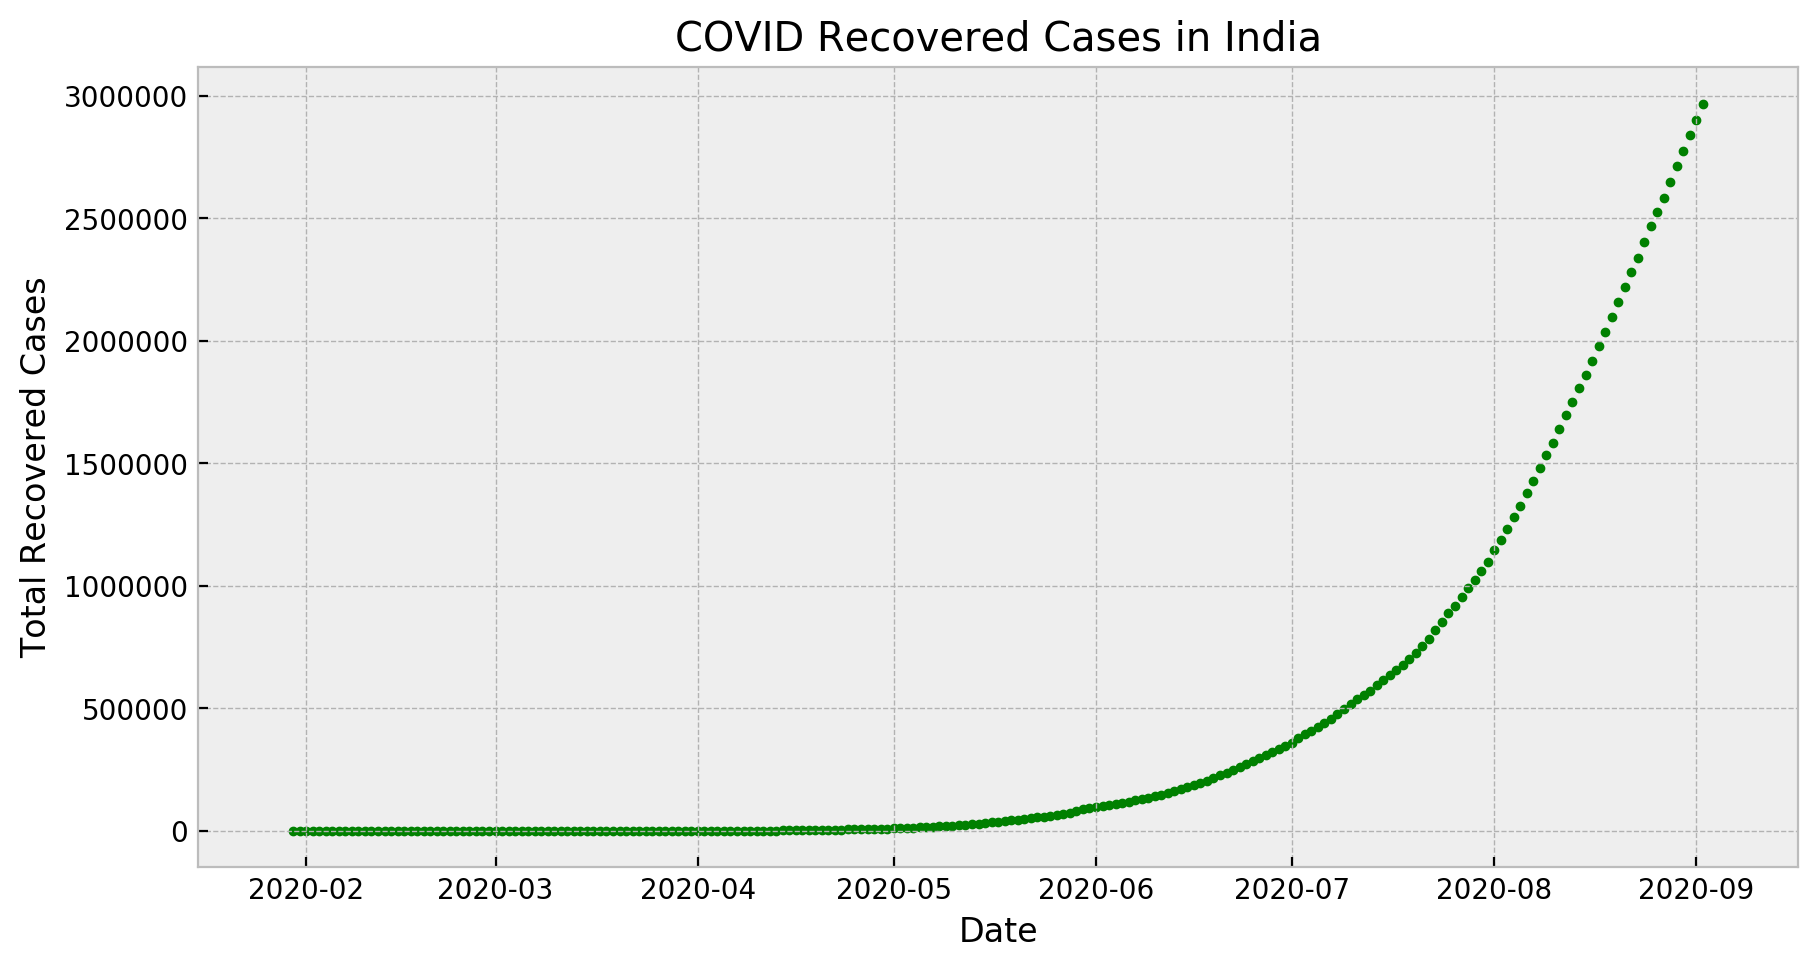

In [537]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df_time_series["Date"],df_time_series["Total Recovered"],color='green',marker=".")
axes.set_xlabel("Date")
axes.set_ylabel("Total Recovered Cases")
axes.set_title("COVID Recovered Cases in India")

### 4.3 Deceased Case <a id="subheading3"></a>

Text(0.5, 1.0, 'COVID Deceased Cases in India')

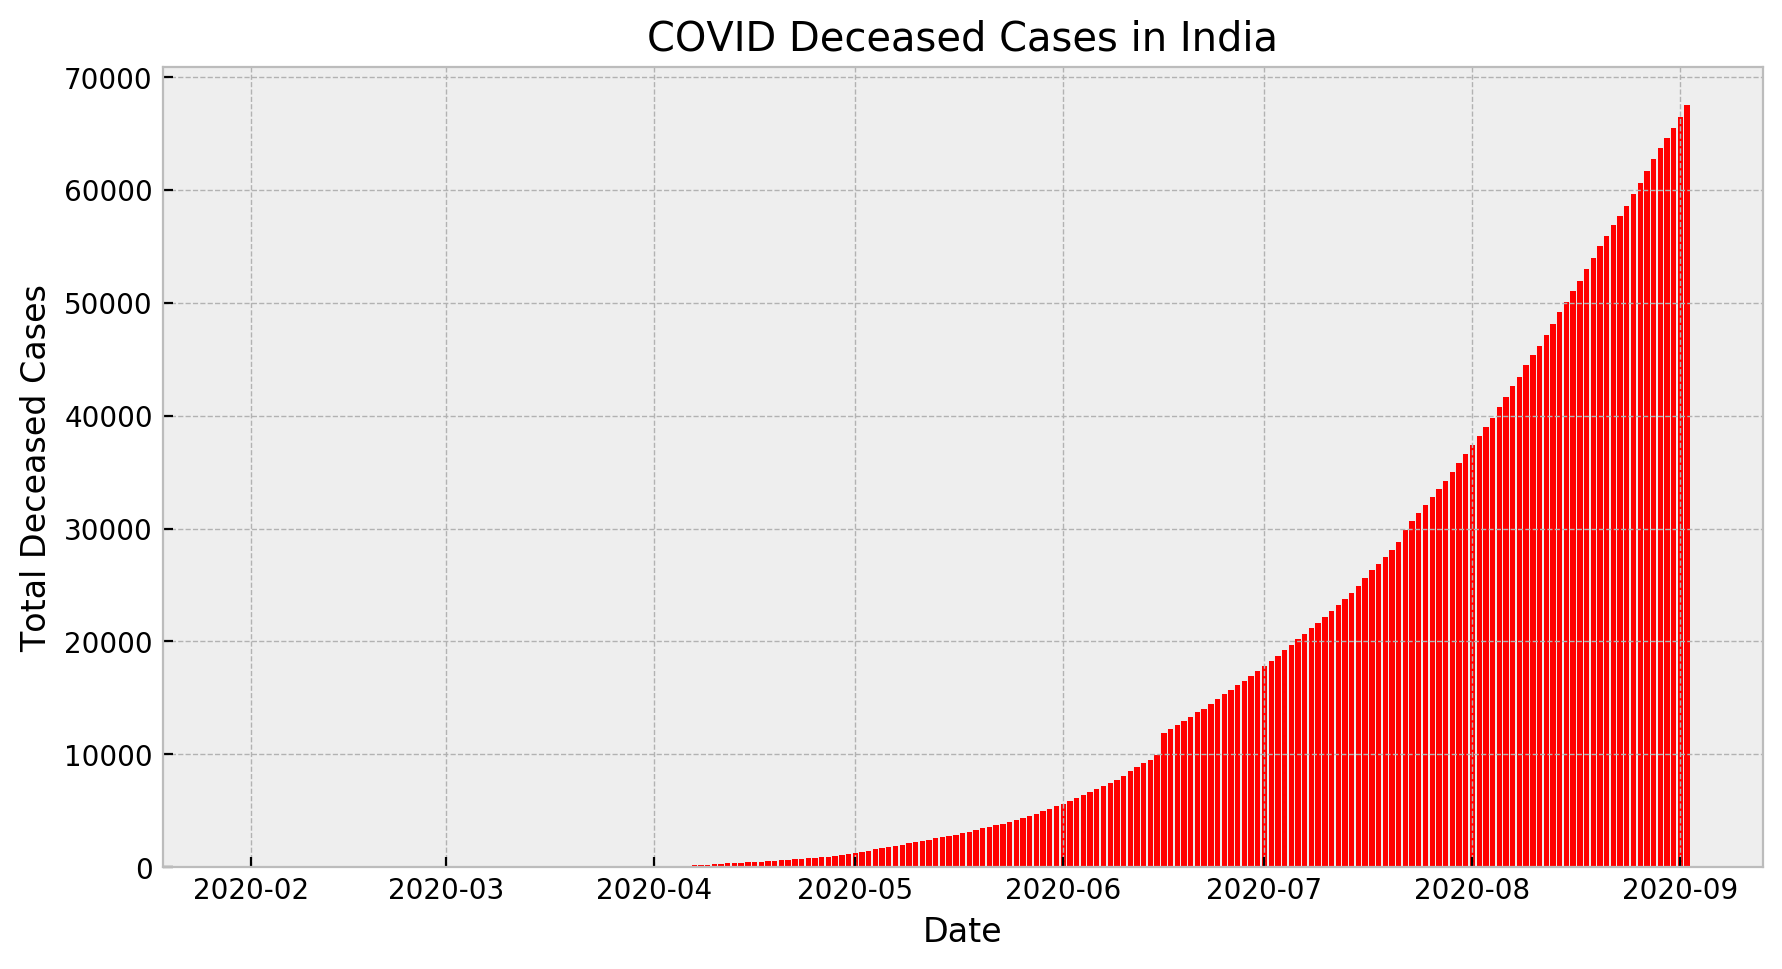

In [538]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df_time_series["Date"],df_time_series["Total Deceased"],color='red')
axes.set_xlabel("Date")
axes.set_ylabel("Total Deceased Cases")
axes.set_title("COVID Deceased Cases in India")

Text(0.5, 1.0, 'COVID Deceased Cases in India')

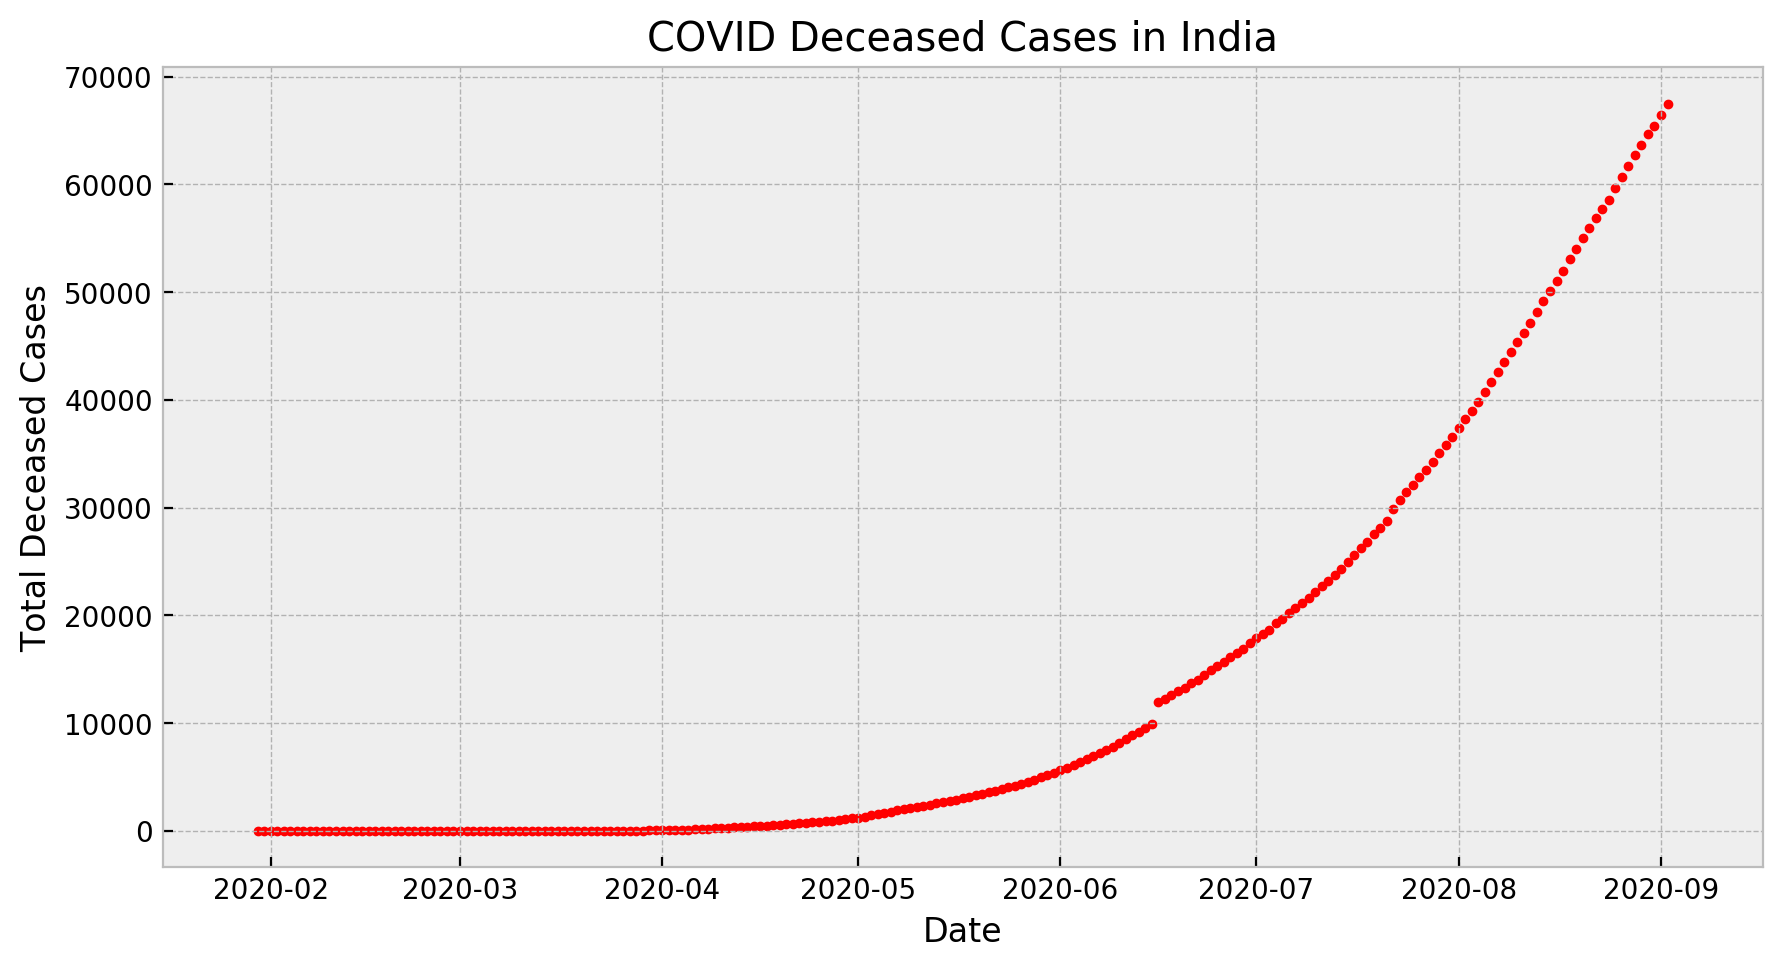

In [539]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df_time_series["Date"],df_time_series["Total Deceased"],color='red',marker=".")
axes.set_xlabel("Date")
axes.set_ylabel("Total Deceased Cases")
axes.set_title("COVID Deceased Cases in India")

In [540]:
df.style.background_gradient(cmap='Reds')

,State,Confirmed,Recovered,Deaths,Active,State_code
1,Maharashtra,825739,598496,25195,201703,MH
3,Andhra Pradesh,455531,348330,4125,103076,AP
2,Tamil Nadu,439959,380063,7516,52380,TN
4,Karnataka,361341,260913,5950,94459,KA
6,Uttar Pradesh,241439,181364,3616,56459,UP
5,Delhi,179569,158586,4481,16502,DL
7,West Bengal,168697,140913,3339,24445,WB
8,Bihar,140234,123404,722,16107,BR
9,Telangana,133406,100013,856,32537,TG
11,Assam,115280,88727,323,26227,AS


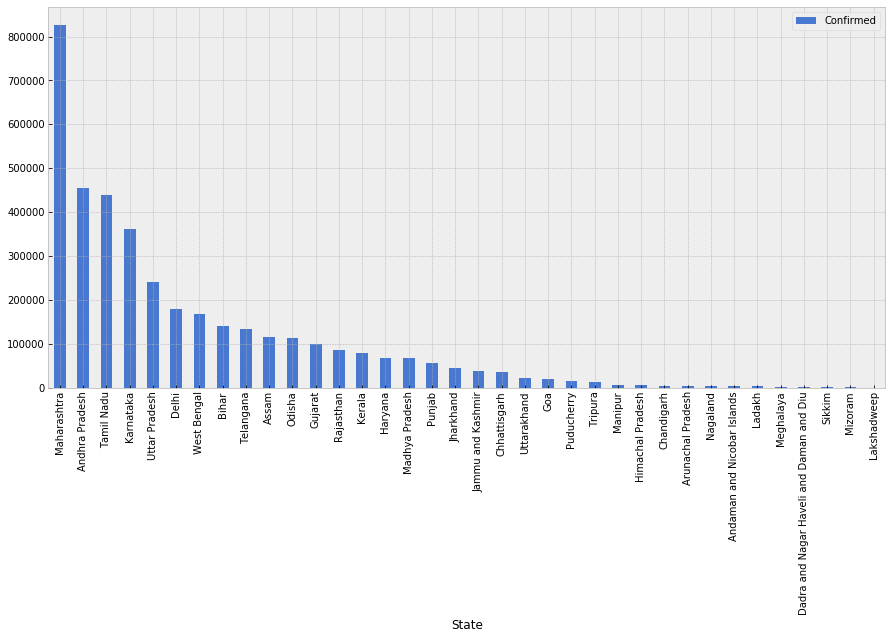

In [541]:
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = 15,7
df.plot(kind="bar",x="State",y="Confirmed",color='b')
plt.show()

C:\Users\Nitin Verma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



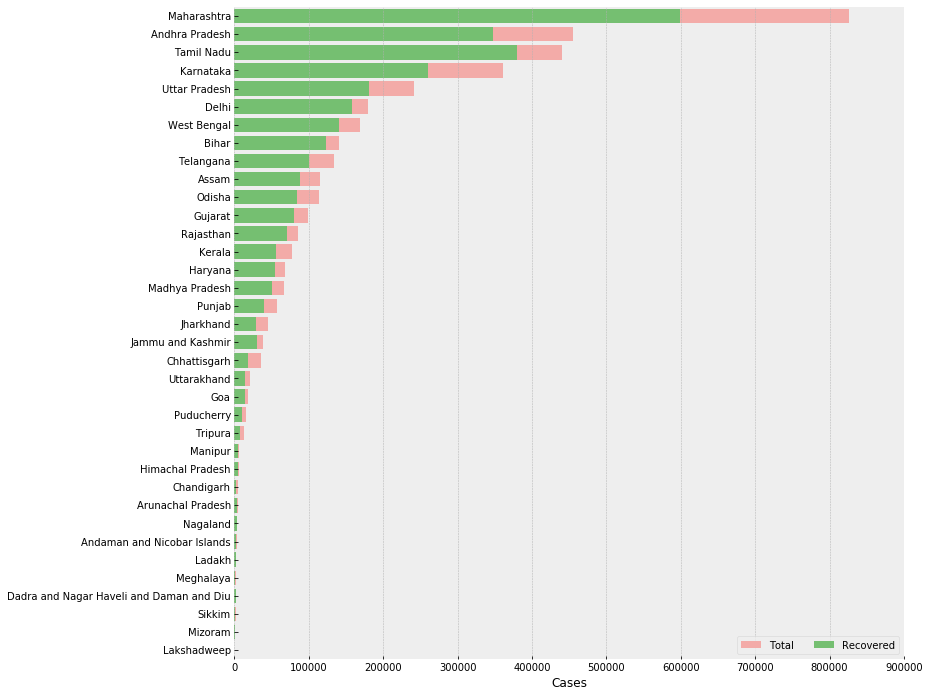

In [542]:
f,ax = plt.subplots(figsize=(12,12))
data = df_full[['State',"Confirmed","Recovered","Deaths"]]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State", data=data, label="Total",color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="State", data=data, label="Recovered",color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,900000), ylabel="", xlabel="Cases")
sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'COVID Cases in India')

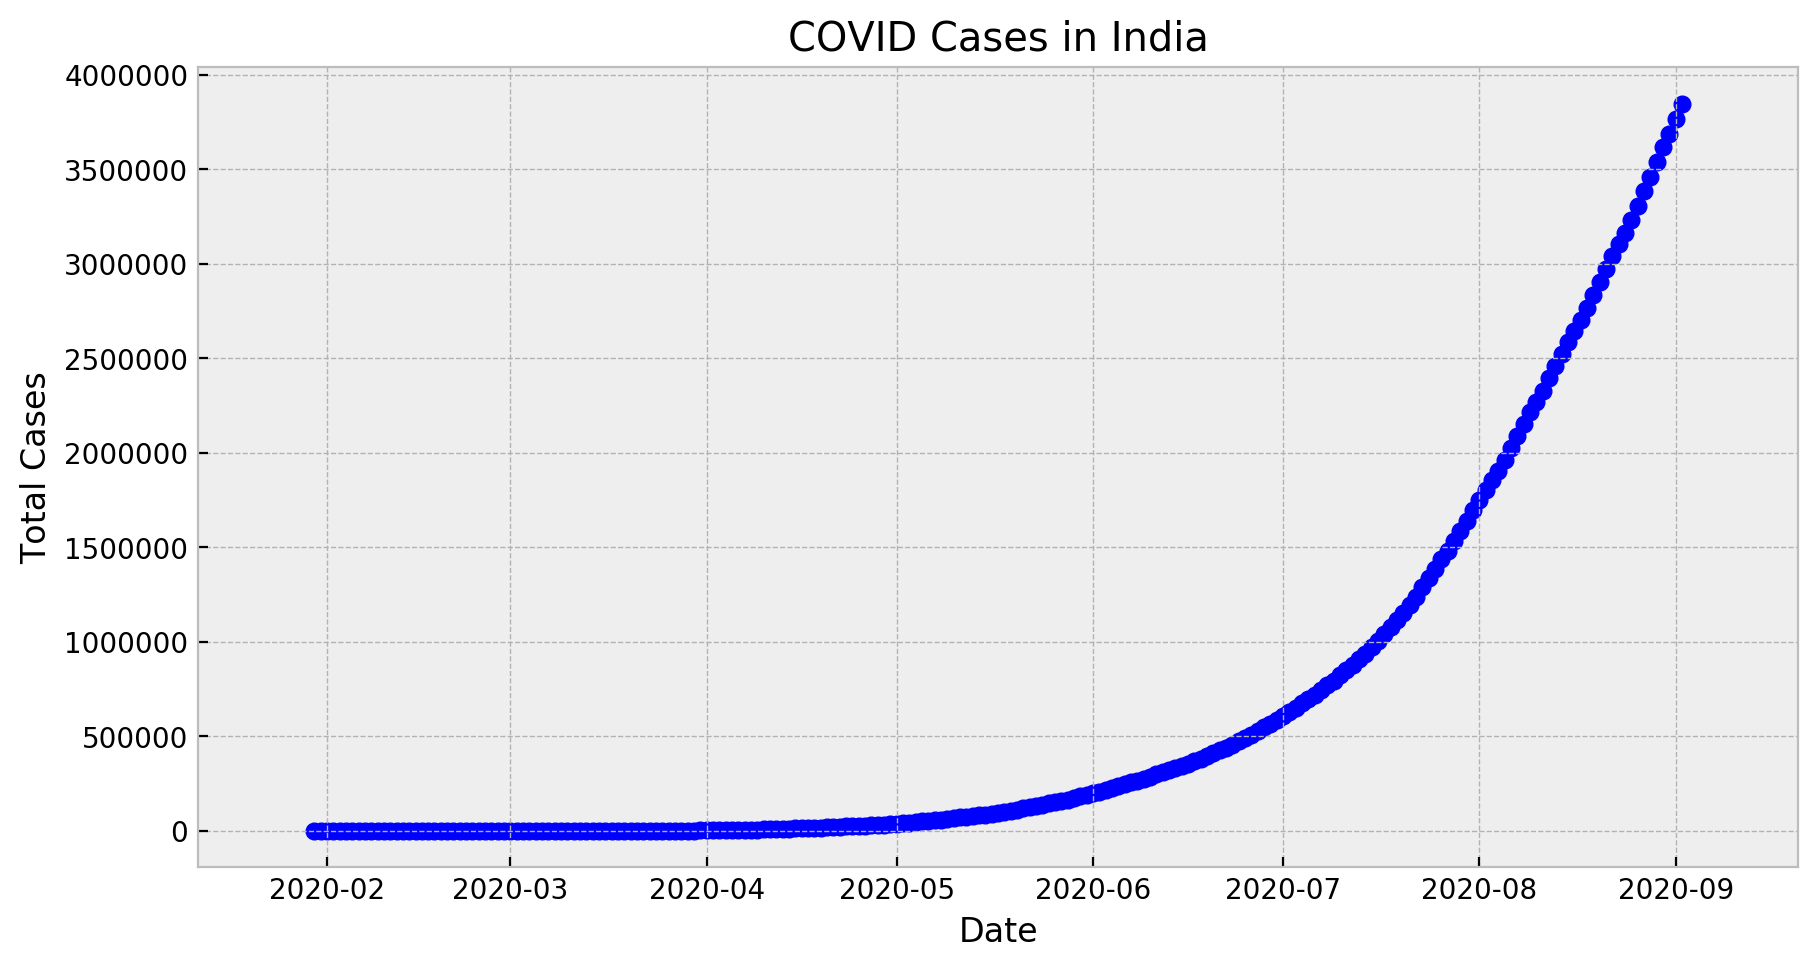

In [543]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df_time_series["Date"],df_time_series["Total Confirmed"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

Text(0.5, 1.0, 'COVID Cases in India')

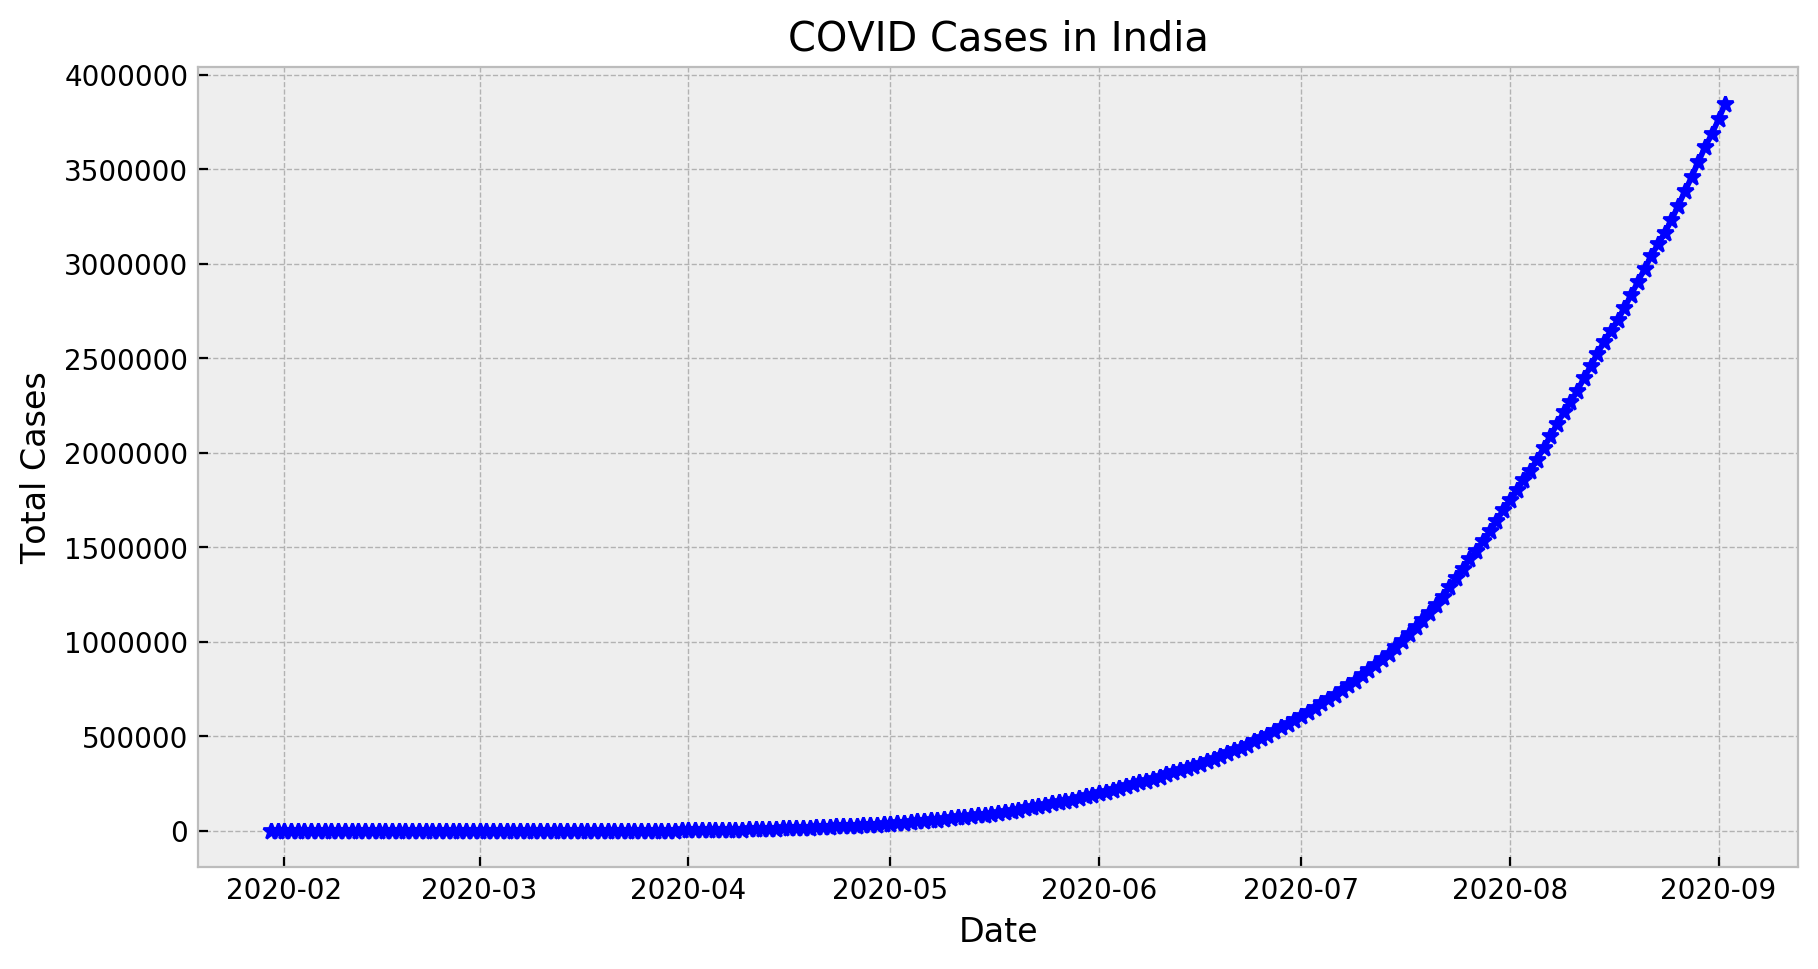

In [544]:

fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(df_time_series["Date"],df_time_series["Total Confirmed"],color='blue',marker="*")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")



Text(0.5, 1.0, 'COVID Cases in India')

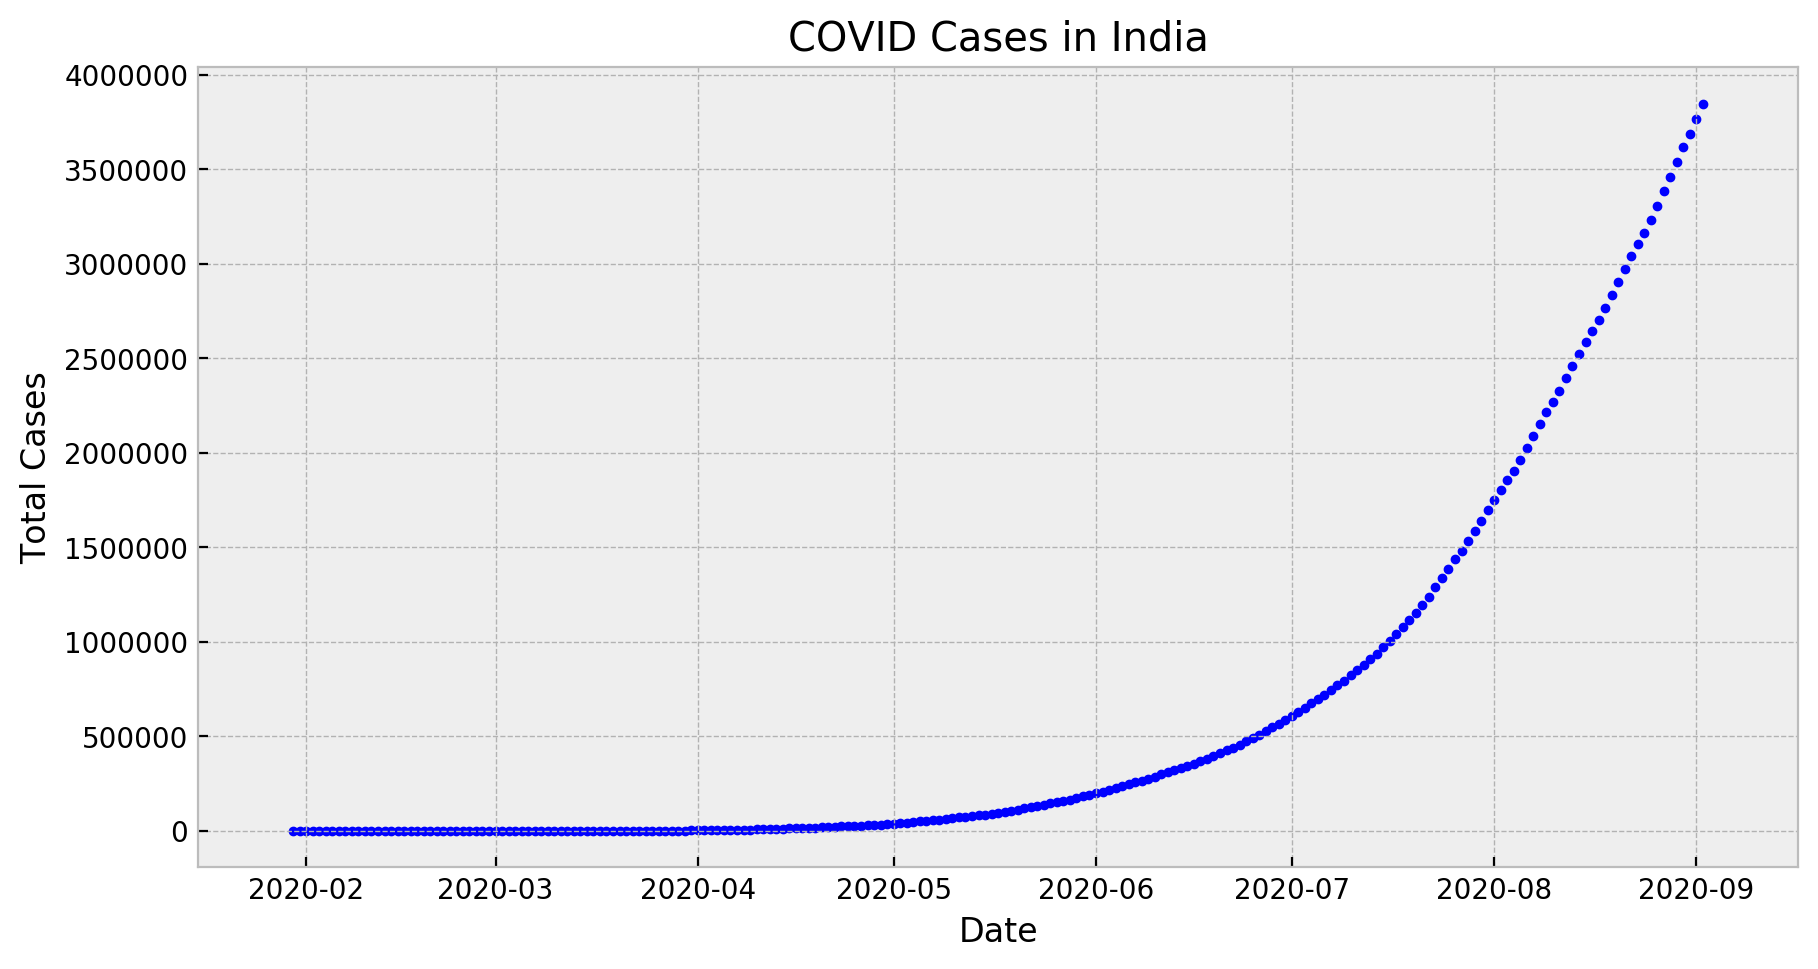

In [545]:
fig = plt.figure(figsize=(10,5),dpi=200)
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.scatter(df_time_series["Date"],df_time_series["Total Confirmed"],color='blue',marker=".")
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("COVID Cases in India")

In [546]:
import plotly.express as px

In [547]:
fig = px.scatter(df_time_series, x="Date", y="Total Confirmed", color="Total Confirmed", title="COVID in India",color_continuous_scale='Bluered')
fig.show()

In [548]:
fig.write_html("confirmed.html")

In [549]:
fig = px.bar(df_time_series, x="Date", y="Total Confirmed", color="Total Confirmed", title="COVID in India",color_continuous_scale='Bluered')
fig.show()

In [550]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_time_series['Date'],y=df_time_series['Total Confirmed'],mode='lines+markers',name='Total Confirmed',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_time_series['Date'],y=df_time_series['Total Deceased'],mode='lines+markers',name='Total Deceased',line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_time_series['Date'],y=df_time_series['Total Recovered'],mode='lines+markers',name='Total Recovered',line=dict(color='green')))

In [551]:
map = folium.Map(location=[20,70],zoom_start=5, tiles="CartoDB Dark_Matter")
for lat,long,value,name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State']):
  folium.CircleMarker([lat,long], radius=value*0.00003, popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>'+'<strong>Total Cases</strong>'+str(value)+'<br>'),
  color = 'red', fill_color='red',fill_opacity=0.3).add_to(map)
map

### Count Forecasting

In [552]:
confirmed=df_time_series[['Date','Daily Confirmed']]
confirmed.columns = ['ds','y']

In [553]:
from fbprophet import Prophet
confirmed.columns
confirmed.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,1
4,2020-02-03,1


In [554]:
m = Prophet(interval_width=0.96)
m.fit(confirmed)
future = m.make_future_dataframe(periods=30)
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
242,2020-09-28
243,2020-09-29
244,2020-09-30
245,2020-10-01
246,2020-10-02


In [555]:
forecast = m.predict(future)


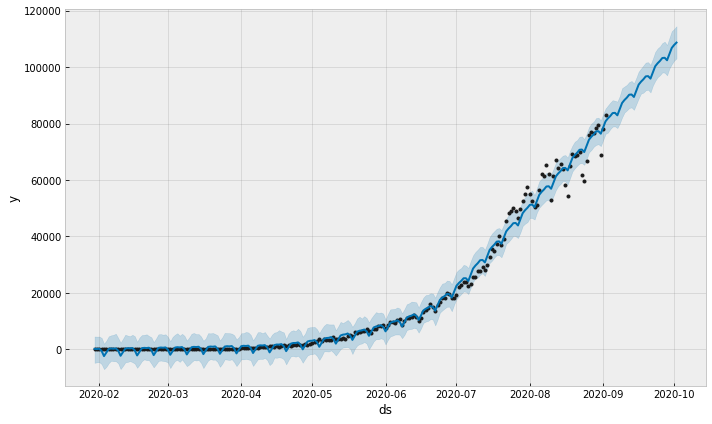

In [556]:
forecast_plot = m.plot(forecast)



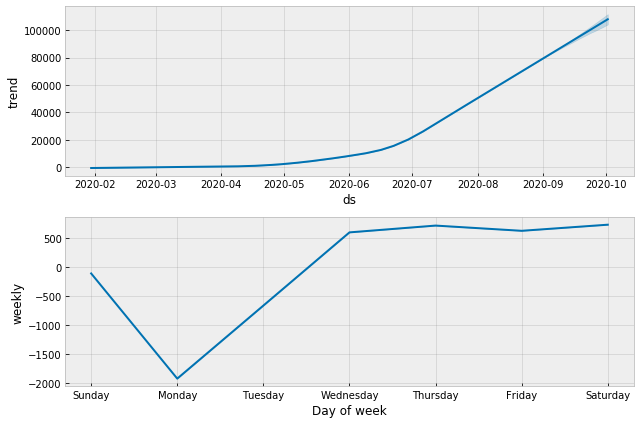

In [557]:
components_plot = m.plot_components(forecast)

In [558]:
recovered=df_time_series[['Date','Total Recovered']]
recovered.columns = ['ds','y']

In [559]:
from fbprophet import Prophet
recovered.columns
recovered.head()

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [560]:
m = Prophet(interval_width=0.96)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [561]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-2.067783e+03,-7.482909e+04,6.598222e+04,-2.067783e+03,-2.067783e+03,-2255.652129,-2255.652129,-2255.652129,-2255.652129,-2255.652129,-2255.652129,0.0,0.0,0.0,-4.323435e+03
1,2020-01-31,-2.006704e+03,-7.507867e+04,6.132660e+04,-2.006704e+03,-2.006704e+03,-1741.470564,-1741.470564,-1741.470564,-1741.470564,-1741.470564,-1741.470564,0.0,0.0,0.0,-3.748175e+03
2,2020-02-01,-1.945626e+03,-7.100775e+04,6.751498e+04,-1.945626e+03,-1.945626e+03,-432.243908,-432.243908,-432.243908,-432.243908,-432.243908,-432.243908,0.0,0.0,0.0,-2.377869e+03
3,2020-02-02,-1.884547e+03,-7.332974e+04,7.482909e+04,-1.884547e+03,-1.884547e+03,19.160740,19.160740,19.160740,19.160740,19.160740,19.160740,0.0,0.0,0.0,-1.865386e+03
4,2020-02-03,-1.823468e+03,-7.194676e+04,7.230455e+04,-1.823468e+03,-1.823468e+03,1080.218366,1080.218366,1080.218366,1080.218366,1080.218366,1080.218366,0.0,0.0,0.0,-7.432495e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-09-05,2.978209e+06,2.899357e+06,3.055714e+06,2.971011e+06,2.986446e+06,-432.243908,-432.243908,-432.243908,-432.243908,-432.243908,-432.243908,0.0,0.0,0.0,2.977777e+06
220,2020-09-06,3.028421e+06,2.957196e+06,3.104980e+06,3.017950e+06,3.041134e+06,19.160740,19.160740,19.160740,19.160740,19.160740,19.160740,0.0,0.0,0.0,3.028441e+06
221,2020-09-07,3.078634e+06,3.009310e+06,3.152414e+06,3.064736e+06,3.096765e+06,1080.218366,1080.218366,1080.218366,1080.218366,1080.218366,1080.218366,0.0,0.0,0.0,3.079714e+06
222,2020-09-08,3.128846e+06,3.054660e+06,3.205246e+06,3.110268e+06,3.152599e+06,1612.127399,1612.127399,1612.127399,1612.127399,1612.127399,1612.127399,0.0,0.0,0.0,3.130458e+06


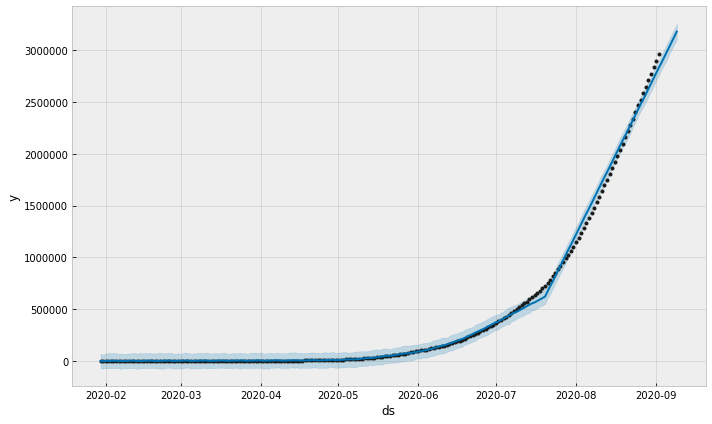

In [562]:
forecast_plot = m.plot(forecast)

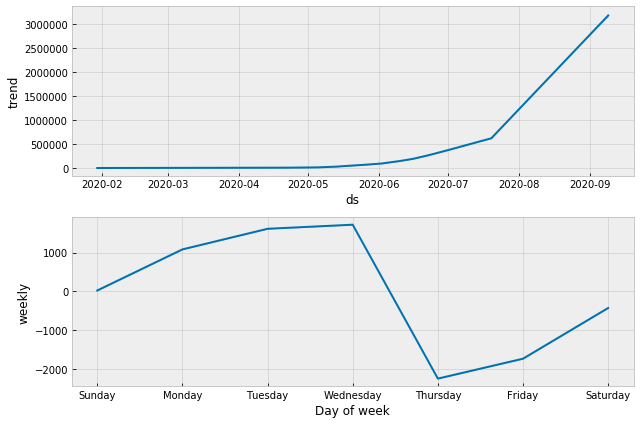

In [563]:
components_plot = m.plot_components(forecast)

In [564]:
deceased=df_time_series[['Date','Total Deceased']]
deceased.columns = ['ds','y']

In [565]:
from fbprophet import Prophet
deceased.columns
deceased.head()

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,0
3,2020-02-02,0
4,2020-02-03,0


In [566]:
m = Prophet(interval_width=0.96)
m.fit(deceased)
future = m.make_future_dataframe(periods=7)
future.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [567]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-30,-11.063529,-673.407199,538.220090,-11.063529,-11.063529,0.104864,0.104864,0.104864,0.104864,0.104864,0.104864,0.0,0.0,0.0,-10.958666
1,2020-01-31,-10.636898,-646.432515,556.196610,-10.636898,-10.636898,-0.804554,-0.804554,-0.804554,-0.804554,-0.804554,-0.804554,0.0,0.0,0.0,-11.441452
2,2020-02-01,-10.210267,-656.526251,600.806012,-10.210267,-10.210267,-8.972336,-8.972336,-8.972336,-8.972336,-8.972336,-8.972336,0.0,0.0,0.0,-19.182603
3,2020-02-02,-9.783635,-671.649892,550.984330,-9.783635,-9.783635,-14.269032,-14.269032,-14.269032,-14.269032,-14.269032,-14.269032,0.0,0.0,0.0,-24.052668
4,2020-02-03,-9.357004,-647.046557,569.915104,-9.357004,-9.357004,-34.566348,-34.566348,-34.566348,-34.566348,-34.566348,-34.566348,0.0,0.0,0.0,-43.923352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020-09-05,69302.800223,68679.541438,69924.335841,69181.733073,69457.506309,-8.972336,-8.972336,-8.972336,-8.972336,-8.972336,-8.972336,0.0,0.0,0.0,69293.827886
220,2020-09-06,70198.553670,69517.232495,70793.183035,70012.161444,70414.379413,-14.269032,-14.269032,-14.269032,-14.269032,-14.269032,-14.269032,0.0,0.0,0.0,70184.284638
221,2020-09-07,71094.307118,70372.470611,71734.070524,70842.462413,71385.768571,-34.566348,-34.566348,-34.566348,-34.566348,-34.566348,-34.566348,0.0,0.0,0.0,71059.740770
222,2020-09-08,71990.060566,71336.347603,72758.313300,71661.743749,72361.644135,25.111828,25.111828,25.111828,25.111828,25.111828,25.111828,0.0,0.0,0.0,72015.172394


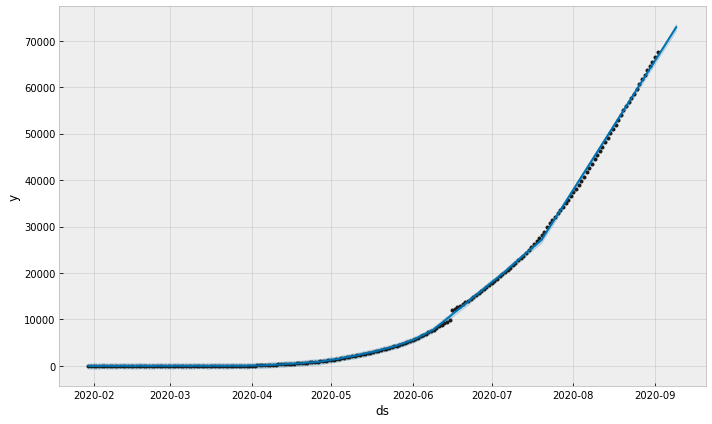

In [568]:
forecast_plot = m.plot(forecast)

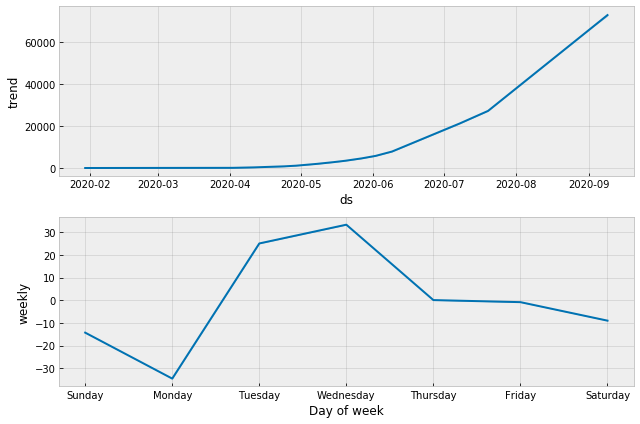

In [569]:
components_plot = m.plot_components(forecast)

In [571]:
!ipython nbconvert 20200903_COVID.ipynb
import os
os.rename(r'20200903_COVID.html',r'index.html')

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook 20200903_COVID.ipynb to html
[NbConvertApp] Writing 2794049 bytes to 20200903_COVID.html


In [ ]:
!ipython nbconvert 20200903_COVID.ipynb